In [1]:
import bs4 as bs
import pickle
import requests
import os

In [76]:
#save function

def save_500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text)
    table = soup.find('table',{'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        ticker = ticker.rstrip('\n')
        if ticker == 'BRK.B':
            ticker = 'BRK-B'
        elif ticker == 'BF.B':
            ticker = 'BF-B'
        tickers.append(ticker)
    with open('sp500tickers.pickle','wb') as f:
        pickle.dump(tickers, f)          
    return(tickers)
            

In [77]:
save_500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK-B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS

In [54]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as web

In [62]:
def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_500_tickers
    else:
        with open('sp500tickers.pickle','rb') as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2019,4,10)
    end = dt.datetime(2019,5,3)
    tickers[84] = 'BF-B'
    tickers[71] = 'BRK-B'
    for ticker in tickers:
        if not os.path.exists('stock_dfs/{}_new.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}_new.csv'.format(ticker))
        else:
            print('{}_new Already exist'.format(ticker))
        

In [60]:
a = tickers[71]

'BRK.B'

In [63]:

start = dt.datetime(2019,4,10)
end = dt.datetime(2019,5,3)
df = web.DataReader('BRK-B', 'yahoo', start, end)

In [66]:
#get all the data
get_data_from_yahoo()

MMM_new Already exist
ABT_new Already exist
ABBV_new Already exist
ABMD_new Already exist
ACN_new Already exist
ATVI_new Already exist
ADBE_new Already exist
AMD_new Already exist
AAP_new Already exist
AES_new Already exist
AMG_new Already exist
AFL_new Already exist
A_new Already exist
APD_new Already exist
AKAM_new Already exist
ALK_new Already exist
ALB_new Already exist
ARE_new Already exist
ALXN_new Already exist
ALGN_new Already exist
ALLE_new Already exist
AGN_new Already exist
ADS_new Already exist
LNT_new Already exist
ALL_new Already exist
GOOGL_new Already exist
GOOG_new Already exist
MO_new Already exist
AMZN_new Already exist
AEE_new Already exist
AAL_new Already exist
AEP_new Already exist
AXP_new Already exist
AIG_new Already exist
AMT_new Already exist
AWK_new Already exist
AMP_new Already exist
ABC_new Already exist
AME_new Already exist
AMGN_new Already exist
APH_new Already exist
APC_new Already exist
ADI_new Already exist
ANSS_new Already exist
ANTM_new Already exis

In [67]:
#compile the data to one file
def compile_data():
    with open('sp500tickers.pickle','rb') as f:
        tickers = pickle.load(f)
    tickers[84] = 'BF-B'
    tickers[71] = 'BRK-B'
    
    main_df = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}_new.csv'.format(ticker))
        df.set_index('Date', inplace= True)
        
        df.rename(columns= {'Adj Close': ticker}, inplace= True)
        df.drop(['Open','High','Low','Close','Volume'], 1, inplace= True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how = 'outer')
        
        if count % 100 == 0:
            print(count)
    main_df.to_csv('sp500_joined_closes_new.csv')

In [68]:
compile_data()

0
100
200
300
400
500


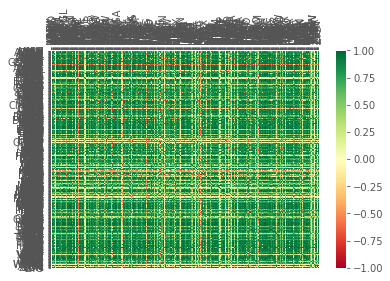